In [1]:
from googleapiclient.discovery import build 
import pandas as pd 
import seaborn as sns

In [2]:
api_key = 'AIza****BA9QL-EY4n*****lz4PHe**Jv2H5jSA' #this api key is not correct

#channel_id = 'UCb5BTETzgJBgQyve21BbebA' #BhopaliMafia

channel_ids= ['UC0rE2qq81of4fojo-KhO5rg' , #1.Tanmay Bhat
              'UCsBjURrPoezykLs9EqgamOA' , #2.Fireship
              'UCS1abmNrZSkWM1vq-sMm63g' , #3.Gareeb Scientist
              'UC6uKrU_WqJ1R2HMTY3LIx5Q' , #4.EverydayAstronaut
              'UCQRIKdVEcMTIBaoHLMEN5uA' , #5.DefenceSquad
              'UCsQoiOrh7jzKmE8NBofhTnQ' , #6.VarunMayya
              'UCFe2Kq8Hg15UomoVYdmRg_Q' , #7.techroastshow
              'UCtEUnJ6P2gfffyK9olbutag' , #8.AnuragSalgaonkar
              'UCBGOUQHNNtNGcGzVq5rIXjw' , #9.KunalKushwaha
              
             ]


youtube = build('youtube','v3',developerKey=api_key)


## Function to get channel statistics


In [3]:
def get_channel_stats(youtube,channel_ids):

    all_data = []

    request = youtube.channels().list(
    part = 'snippet,contentDetails,statistics',
    id = ','.join(channel_ids))
    
    response = request.execute()
    
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                    Playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads']
                    )
        
        all_data.append(data)            
    
    return all_data

In [4]:
channel_statistics = get_channel_stats(youtube, channel_ids)


In [5]:
channel_data = pd.DataFrame(channel_statistics)
channel_data

,Channel_name,Subscribers,Views,Total_videos,Playlist_id
0,Socially Inept,56800,9926339,970,UUFe2Kq8Hg15UomoVYdmRg_Q
1,Gareeb Scientist,550000,72427937,252,UUS1abmNrZSkWM1vq-sMm63g
2,Defence Squad,2810000,451674245,2729,UUQRIKdVEcMTIBaoHLMEN5uA
3,Tanmay Bhat,5180000,1987207613,1361,UU0rE2qq81of4fojo-KhO5rg
4,Kunal Kushwaha,753000,47610125,367,UUBGOUQHNNtNGcGzVq5rIXjw
5,Fireship,3810000,579620097,725,UUsBjURrPoezykLs9EqgamOA
6,Varun Mayya,838000,253225581,862,UUsQoiOrh7jzKmE8NBofhTnQ
7,Anurag Salgaonkar,377000,51524216,193,UUtEUnJ6P2gfffyK9olbutag
8,Everyday Astronaut,1840000,316088053,481,UU6uKrU_WqJ1R2HMTY3LIx5Q


In [6]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
Playlist_id     object
dtype: object

In [7]:
channel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Channel_name  9 non-null      object
 1   Subscribers   9 non-null      int64 
 2   Views         9 non-null      int64 
 3   Total_videos  9 non-null      int64 
 4   Playlist_id   9 non-null      object
dtypes: int64(3), object(2)
memory usage: 492.0+ bytes


In [8]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,Playlist_id
0,Socially Inept,56800,9926339,970,UUFe2Kq8Hg15UomoVYdmRg_Q
1,Gareeb Scientist,550000,72427937,252,UUS1abmNrZSkWM1vq-sMm63g
2,Defence Squad,2810000,451674245,2729,UUQRIKdVEcMTIBaoHLMEN5uA
3,Tanmay Bhat,5180000,1987207613,1361,UU0rE2qq81of4fojo-KhO5rg
4,Kunal Kushwaha,753000,47610125,367,UUBGOUQHNNtNGcGzVq5rIXjw
5,Fireship,3810000,579620097,725,UUsBjURrPoezykLs9EqgamOA
6,Varun Mayya,838000,253225581,862,UUsQoiOrh7jzKmE8NBofhTnQ
7,Anurag Salgaonkar,377000,51524216,193,UUtEUnJ6P2gfffyK9olbutag
8,Everyday Astronaut,1840000,316088053,481,UU6uKrU_WqJ1R2HMTY3LIx5Q


In [9]:
channel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Channel_name  9 non-null      object
 1   Subscribers   9 non-null      int64 
 2   Views         9 non-null      int64 
 3   Total_videos  9 non-null      int64 
 4   Playlist_id   9 non-null      object
dtypes: int64(3), object(2)
memory usage: 492.0+ bytes


In [10]:
channel_data.head(2)

,Channel_name,Subscribers,Views,Total_videos,Playlist_id
0,Socially Inept,56800,9926339,970,UUFe2Kq8Hg15UomoVYdmRg_Q
1,Gareeb Scientist,550000,72427937,252,UUS1abmNrZSkWM1vq-sMm63g


In [12]:
channel_data.tail(2)

,Channel_name,Subscribers,Views,Total_videos,Playlist_id
7,Socially Inept,56800,9916838,969,UUFe2Kq8Hg15UomoVYdmRg_Q
8,Defence Squad,2810000,451597523,2729,UUQRIKdVEcMTIBaoHLMEN5uA


In [20]:
channel_data.sample(2)

,Channel_name,Subscribers,Views,Total_videos,Playlist_id
3,Fireship,3810000,579416266,724,UUsBjURrPoezykLs9EqgamOA
2,Gareeb Scientist,550000,72426910,252,UUS1abmNrZSkWM1vq-sMm63g


In [11]:
#how many youtuber has subs more than 500k 
subs = channel_data[channel_data['Subscribers'] <=550000]
subs[['Channel_name','Subscribers','Total_videos']]


,Channel_name,Subscribers,Total_videos
0,Socially Inept,56800,970
1,Gareeb Scientist,550000,252
7,Anurag Salgaonkar,377000,193


## Q. #Identify the channel(s) with the maximum and minimum subscribers and display their details (all columns).

In [149]:
#this is method use idxmin or idxmax (idx = index --->this return the index of min or max value in the table) 
#which find the 1st occurence of the min or max value in the table 

channel_data.loc[channel_data['Subscribers'].idxmax()]

channel_data.loc[channel_data['Subscribers'].idxmin()]


#                       OR

Channel_name              Socially Inept
Subscribers                        56800
Views                            9916838
Total_videos                         969
Playlist_id     UUFe2Kq8Hg15UomoVYdmRg_Q
Name: 1, dtype: object

In [150]:
#this method is more useful to find multiple max or min values (or all values)

max_cnt = channel_data['Subscribers'].max()
channel_data[channel_data['Subscribers']== max_cnt]

,Channel_name,Subscribers,Views,Total_videos,Playlist_id
0,Tanmay Bhat,5180000,1986690132,1359,UU0rE2qq81of4fojo-KhO5rg


## Plotting graphes

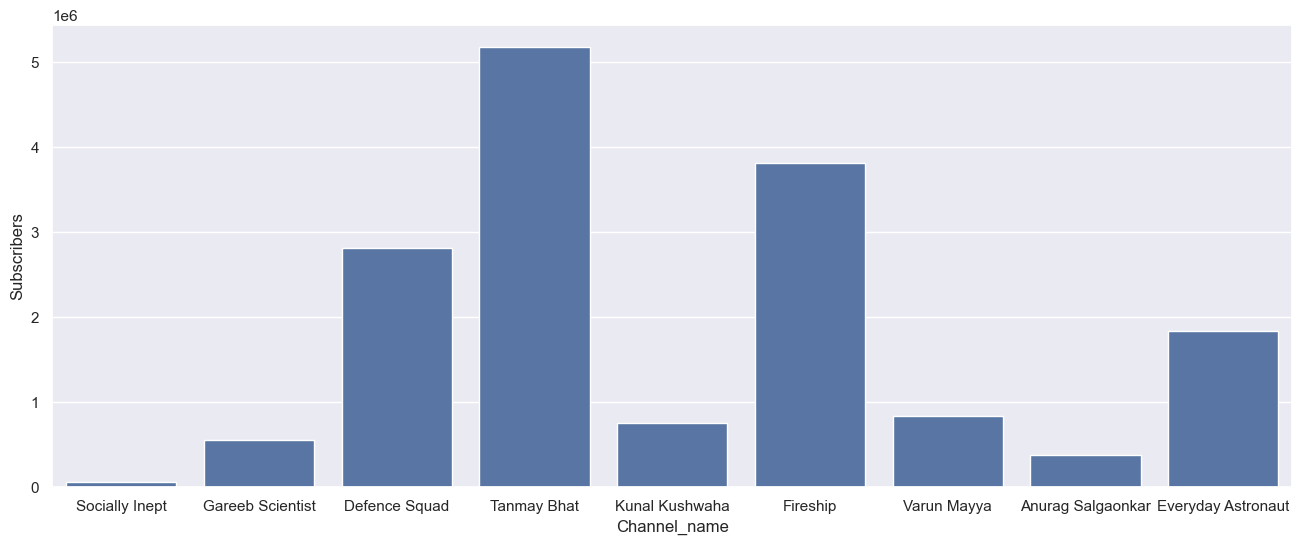

In [15]:
sns.set(rc= {'figure.figsize':(16,6)})
ax = sns.barplot(x= 'Channel_name',y = 'Subscribers',data= channel_data)

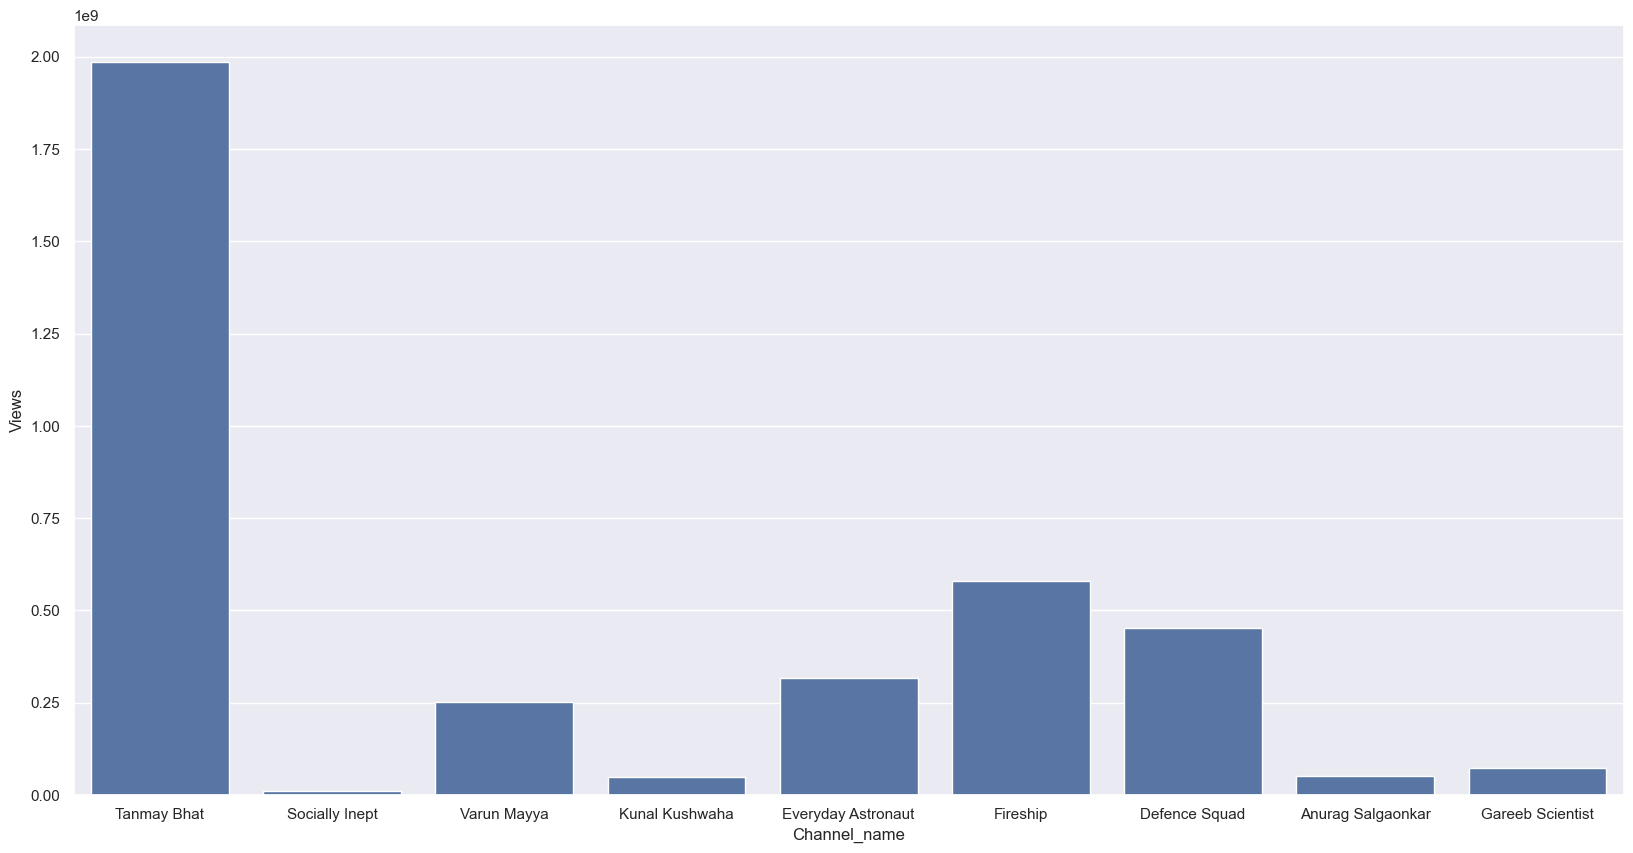

In [155]:
ax2 = sns.barplot(x= 'Channel_name',y = 'Views',data= channel_data)

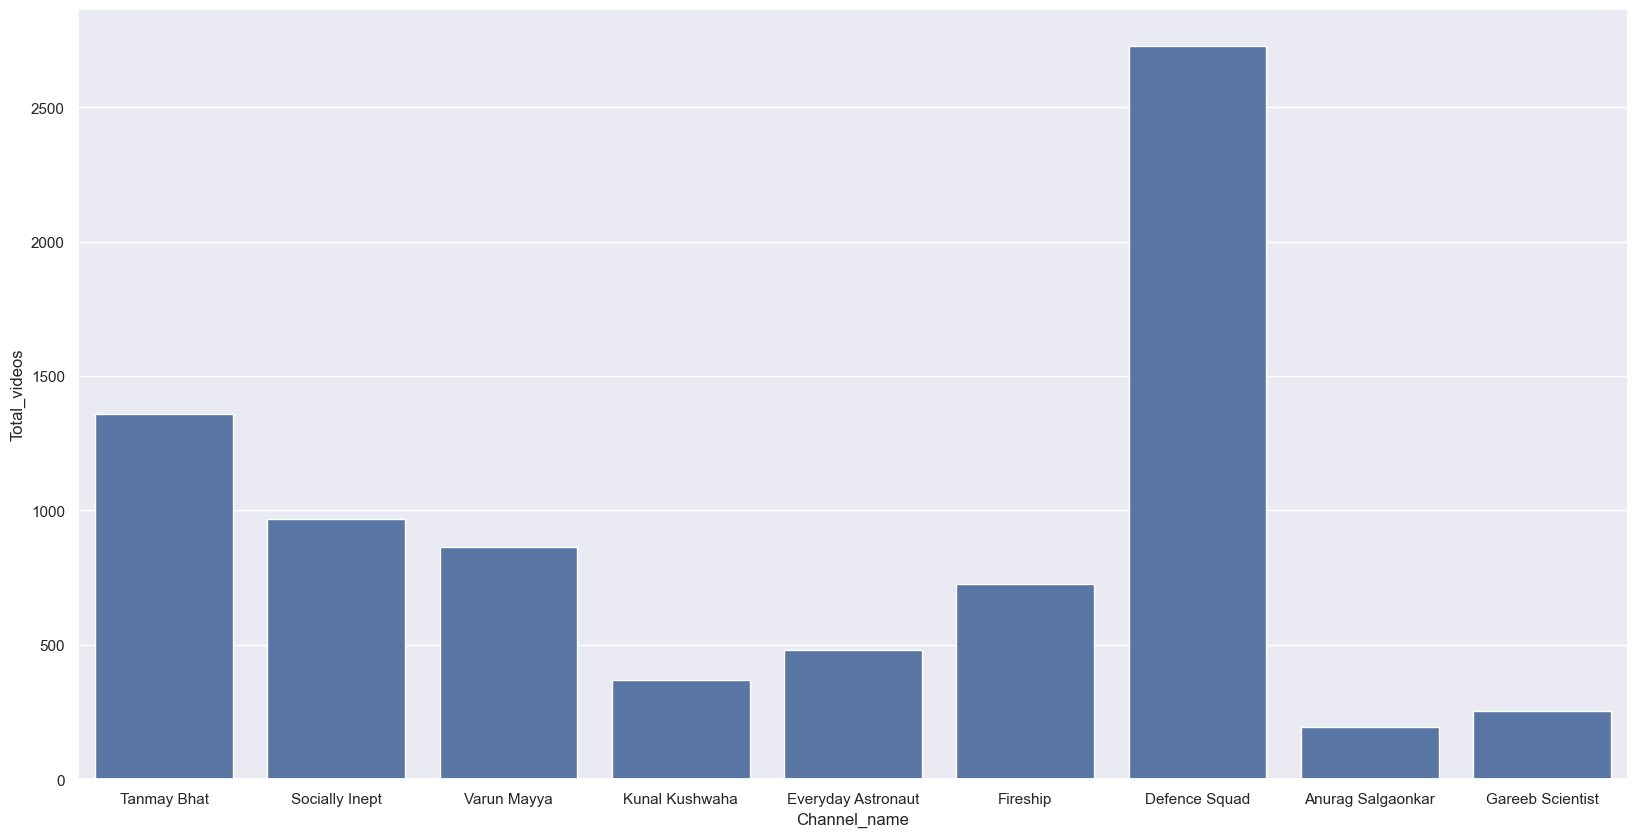

In [156]:
ax3 = sns.barplot(x= 'Channel_name',y = 'Total_videos',data= channel_data)

## Function to get video IDs

In [16]:
#Getting Anurag Salgaonkar playlist id 
a = 'Anurag Salgaonkar'
playlist_id = channel_data.loc[channel_data['Channel_name'] == a ,'Playlist_id'].iloc[0]
playlist_id

'UUtEUnJ6P2gfffyK9olbutag'

In [17]:
def get_video_ids(youtube, playlist_id):
    request = youtube.playlistItems().list(
                part = 'contentDetails',
                playlistId = playlist_id,
                maxResults = 50 )
    response = request.execute()

    video_ids = []

    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
        if next_page_token is None:
            more_pages = False
        
        else :
            request = youtube.playlistItems().list(
                        part = 'contentDetails',
                        playlistId = playlist_id,
                        maxResults = 50,
                pageToken = next_page_token )
            response = request.execute()

            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
            next_page_token = response.get('nextPageToken')
    
    return video_ids

In [18]:
video_ids = get_video_ids(youtube, playlist_id)

In [19]:
video_ids

['pu12RHc9lec',
 'jy7hVc5jKXo',
 'rePnUf0ilBU',
 'D9YXBNbEH5E',
 'xzWoXpz9bkM',
 'bnUDhMr4Zz8',
 'ZLn9FCbtM4o',
 'aPyQ1rJbMKU',
 '1x6OH1xEonU',
 'ceTjIrqiWKE',
 'efmhLAM2iIg',
 'GAJt-BIgcvY',
 '4FV11Ab0tdw',
 'llOmRKcOrXA',
 'U8vYcG3WObw',
 'YYYonFc_dVo',
 'n51Qpk1H1ag',
 'yxgGkWbVhBU',
 'sYlwExTvxVI',
 'YeL5ik5vDQs',
 'QsdATRsKbEs',
 '9hLgsUBxRe8',
 'wH9dMMtzkow',
 'zazaEiXGNJc',
 'lJzyX6NhLI0',
 'veyWSuVeIXc',
 'iD1L48_QqRA',
 '845hjaoTfFU',
 'g39PXuy6SLI',
 'oUYzxaBLVjY',
 'bsKfa7wUe70',
 '4-tlzVJEgCw',
 'wkMXef7Tvug',
 'U1pyDCaUb0E',
 'Dbm1C47eASA',
 'd-mfCKCC8zk',
 'xNPYzu945_o',
 '_Zx6_yxfHOk',
 'iG64jjw_MeM',
 'qndjLiuwBxw',
 'RgeoucIvRlI',
 'XhRncusNC7Q',
 'SrgIRliSkoo',
 'zo5Mc4CRRBs',
 '4qk0toDhSeA',
 'WCH2yKqMBQI',
 '4Di6wltzCe4',
 'dHlqDr_BH3Q',
 'GsegaIrVIto',
 'preaOOHokOs',
 'KP6q9sV3KrM',
 'eX-EDgJZ3bo',
 'MdBX1o3xp3U',
 'Xuzu2Rh7BsE',
 'XpyqOjHW8dk',
 'Bkd06J20mVU',
 '-0JmrNKIbx0',
 '4VcSDL0mqLs',
 'fqpHXPmGrHQ',
 'M6AtMzcRxp0',
 'N7MZpYBxiGU',
 'Y-d9AJzpdgM',
 'CvAv86

## Function to get Video Details

In [20]:
def get_video_details(youtube,video_ids):
    all_video_stats = []
    for i in range(0,len(video_ids),50):
        request = youtube.videos().list(
                   part = 'snippet, statistics',
                   id = ','.join(video_ids[i:i+50]))
        response = request.execute()

        for video in response['items']:
            
            video_stats = dict(Title = video['snippet']['title'],
                              Published_date = video['snippet']['publishedAt'],
                              Views = video['statistics']['viewCount'],
                              Likes = video['statistics']['likeCount'],
                              Comments = video['statistics']['commentCount'] )
            
            all_video_stats.append(video_stats)
    
    return all_video_stats  

In [21]:
video_details = get_video_details(youtube,video_ids)

In [22]:
video_data = pd.DataFrame(video_details)

In [23]:
video_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           194 non-null    object
 1   Published_date  194 non-null    object
 2   Views           194 non-null    object
 3   Likes           194 non-null    object
 4   Comments        194 non-null    object
dtypes: object(5)
memory usage: 7.7+ KB


In [34]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date  
video_data['Views'] = pd.to_numeric(video_data['Views']) 
video_data['Likes'] = pd.to_numeric(video_data['Likes']) 
video_data['Comments'] = pd.to_numeric(video_data['Comments']) 

video_data

,Title,Published_date,Views,Likes,Comments
0,I went on a CASUAL DATE ft. Triumph Scrambler ...,2025-03-25,135218,9347,555
1,Tiger Rider vs Unicorn Rider,2025-03-20,8923,848,15
2,THE WORST MOTOVLOGGER | Daily Observations #106,2025-03-16,130777,10635,700
3,Even WOMEN are BAD DRIVERS | Daily Observation...,2025-03-11,152528,10332,507
4,The TRUTH about ULTRAVIOLETTE | by a PETROLHEAD,2025-03-02,108855,7246,533
...,...,...,...,...,...
189,How to deal with IDIOTS on road! | Mumbai Traf...,2019-12-10,3142094,52869,2148
190,My first Motovlog | Kolad bike ride | RE 500,2019-10-18,38932,2146,147
191,Trip To the God's own Country | KERALA | Cinem...,2019-02-18,7559,486,33
192,Trip to Bhoga Nandishwara Temple | Republic Da...,2019-01-27,7142,390,26


## Top 10 videos by Views

In [35]:
top10_vids = video_data.sort_values(by = 'Views' , ascending = False).head(10) 

In [36]:
top10_vids

,Title,Published_date,Views,Likes,Comments
102,Why INDIAN ROADS are NEVER SAFE,2022-02-13,5071596,176645,9312
189,How to deal with IDIOTS on road! | Mumbai Traf...,2019-12-10,3142094,52869,2148
113,The Superbike Dream of A Middle Class Indian |...,2021-10-24,1655295,47384,2517
74,DON’T LET THE INTERNET FOOL YOU | Royal Enfiel...,2023-03-19,1443806,45285,3005
144,CRASHED: HIT BY A BUS | Road Rage | Indian Dai...,2021-01-13,1295019,42974,1869
78,BIGGEST MYTHS about Riding Gear BUSTED,2023-01-16,1082562,37880,2606
98,What it means to own your Dream Bike,2022-04-24,1029587,69469,4736
137,When Idiots Meet! | Indian Daily Observations ...,2021-03-21,867191,32125,1363
104,CRASHED WITH WHOLE FAMILY | Daily Observations...,2022-01-30,728020,31337,1506
142,1 Bike 4 People | Indian Daily Observations #3...,2021-01-31,674985,27451,1812


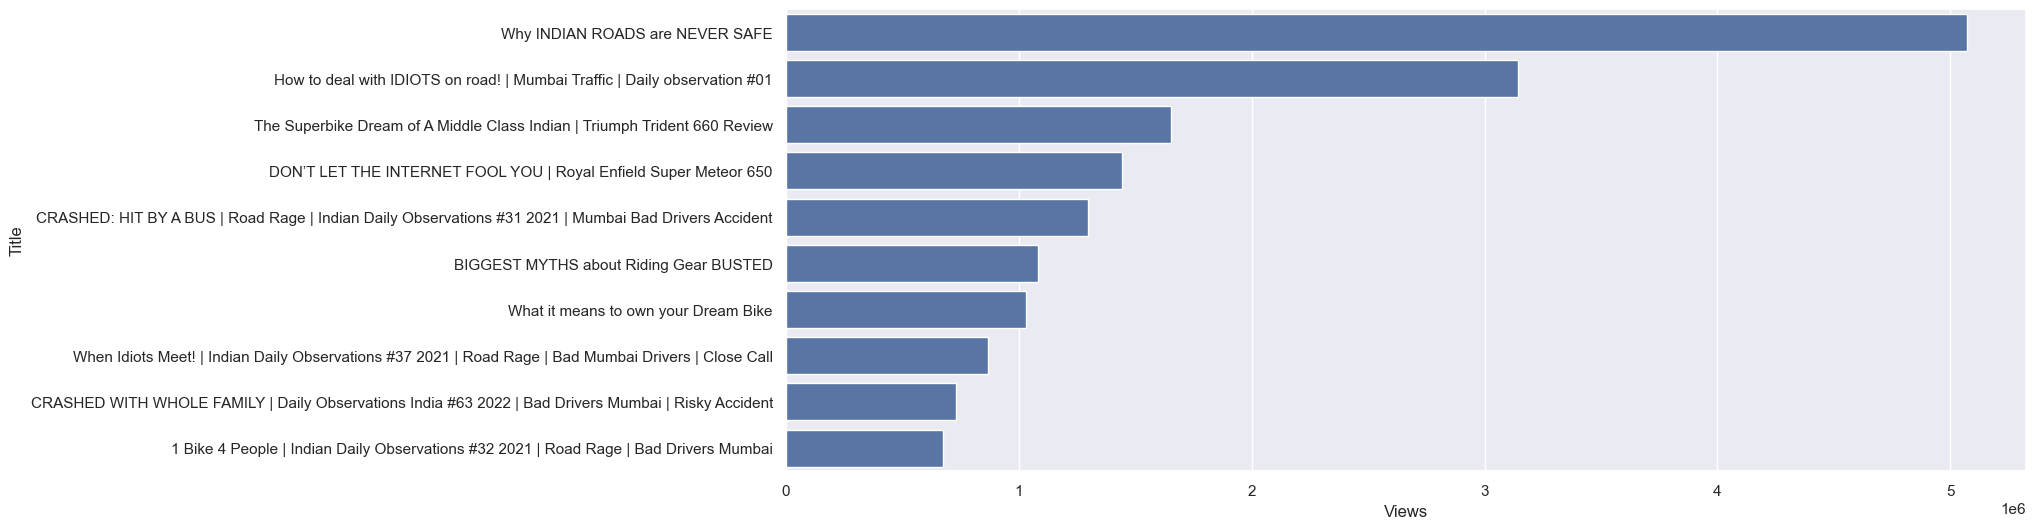

In [37]:
ax1 = sns.barplot(x = 'Views', y = 'Title', data = top10_vids )

## Total videos per month

In [38]:
video_data['Month'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%b')

In [39]:
video_data

,Title,Published_date,Views,Likes,Comments,Month
0,I went on a CASUAL DATE ft. Triumph Scrambler ...,2025-03-25,135218,9347,555,Mar
1,Tiger Rider vs Unicorn Rider,2025-03-20,8923,848,15,Mar
2,THE WORST MOTOVLOGGER | Daily Observations #106,2025-03-16,130777,10635,700,Mar
3,Even WOMEN are BAD DRIVERS | Daily Observation...,2025-03-11,152528,10332,507,Mar
4,The TRUTH about ULTRAVIOLETTE | by a PETROLHEAD,2025-03-02,108855,7246,533,Mar
...,...,...,...,...,...,...
189,How to deal with IDIOTS on road! | Mumbai Traf...,2019-12-10,3142094,52869,2148,Dec
190,My first Motovlog | Kolad bike ride | RE 500,2019-10-18,38932,2146,147,Oct
191,Trip To the God's own Country | KERALA | Cinem...,2019-02-18,7559,486,33,Feb
192,Trip to Bhoga Nandishwara Temple | Republic Da...,2019-01-27,7142,390,26,Jan


In [41]:
videos_per_month = video_data.groupby('Month',as_index = False).size()

In [42]:
videos_per_month

,Month,size
0,Apr,10
1,Aug,14
2,Dec,23
3,Feb,15
4,Jan,21
5,Jul,12
6,Jun,15
7,Mar,19
8,May,12
9,Nov,20


In [43]:
sort_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [44]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories = sort_order , ordered = True)
videos_per_month = videos_per_month.sort_index()

In [45]:
videos_per_month

,Month,size
Month,,
Jan,Jan,21
Feb,Feb,15
Mar,Mar,19
Apr,Apr,10
May,May,12
Jun,Jun,15
Jul,Jul,12
Aug,Aug,14
Sep,Sep,12


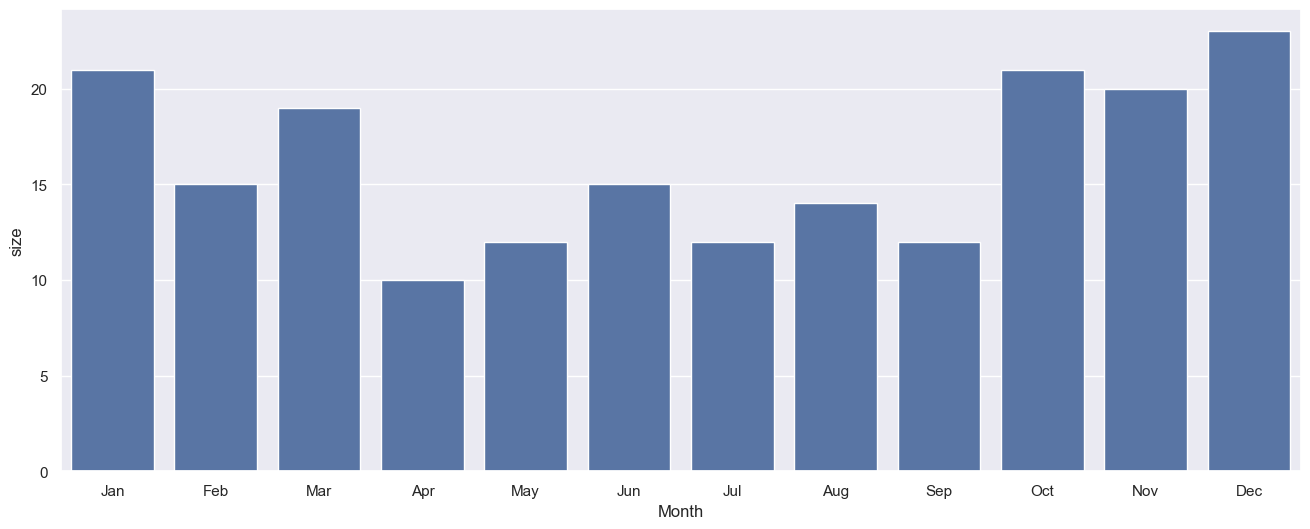

In [46]:
ax2 = sns.barplot(x = 'Month',y = 'size',data = videos_per_month)

In [47]:
video_data 

,Title,Published_date,Views,Likes,Comments,Month
0,I went on a CASUAL DATE ft. Triumph Scrambler ...,2025-03-25,135218,9347,555,Mar
1,Tiger Rider vs Unicorn Rider,2025-03-20,8923,848,15,Mar
2,THE WORST MOTOVLOGGER | Daily Observations #106,2025-03-16,130777,10635,700,Mar
3,Even WOMEN are BAD DRIVERS | Daily Observation...,2025-03-11,152528,10332,507,Mar
4,The TRUTH about ULTRAVIOLETTE | by a PETROLHEAD,2025-03-02,108855,7246,533,Mar
...,...,...,...,...,...,...
189,How to deal with IDIOTS on road! | Mumbai Traf...,2019-12-10,3142094,52869,2148,Dec
190,My first Motovlog | Kolad bike ride | RE 500,2019-10-18,38932,2146,147,Oct
191,Trip To the God's own Country | KERALA | Cinem...,2019-02-18,7559,486,33,Feb
192,Trip to Bhoga Nandishwara Temple | Republic Da...,2019-01-27,7142,390,26,Jan


In [48]:
video_data.to_csv('Video_data(Anurag Salgaonkar).csv')